## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading the dataset

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Define X by selecting only the age and EstimatedSalary, and y with purchased column

In [3]:
X=df[['Age','EstimatedSalary']]
y=df['Purchased']

# Print count of each label in Purchased column

In [4]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

## Print Correlation of each feature in the dataset

In [5]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


# First: Logistic Regression model

## Split the dataset into Training set and Test set with test_size = 0.25 and random_state = 0

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Train the model with random_state = 0

In [5]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(random_state = 0)
lreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Print the prediction results

In [6]:
y_pred = lreg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Create dataframe with the Actual Purchased and Predict Purchased

In [20]:
comp_result= df
comp_result

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [20]:
comp_result = X_test
comp_result['Actual_Purchased']= y_test
comp_result['Predict_Purchased']= y_pred
comp_result


,Age,EstimatedSalary,Actual_Purchased,Predict_Purchased
132,30,87000,0,0
309,38,50000,0,0
341,35,75000,0,0
196,30,79000,0,0
246,35,50000,0,0
...,...,...,...,...
146,27,96000,1,0
135,23,63000,0,0
390,48,33000,1,0
264,48,90000,1,0


In [22]:
(comp_result['Actual_Purchased'] == comp_result['Predict_Purchased']).value_counts()

True     68
False    32
dtype: int64

## Print Confusion Matrix and classification_report

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [8]:
print(confusion_matrix(y_test,y_pred))

[[68  0]
 [32  0]]


In [9]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        68
           1       0.00      0.00      0.00        32

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100



C:\Users\iamra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iamra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iamra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


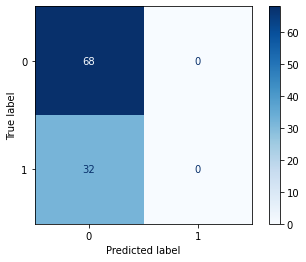

C:\Users\iamra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


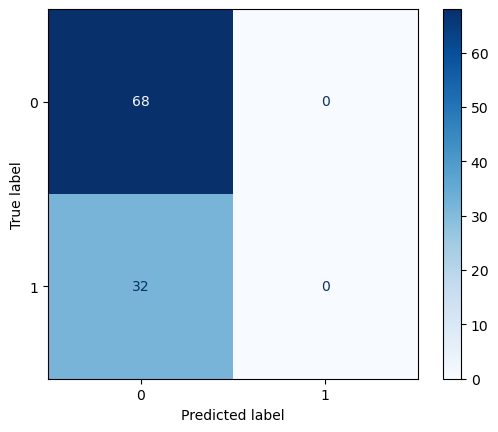

In [10]:
from sklearn.metrics import plot_confusion_matrix
import numpy as np
plot_confusion_matrix(lreg, X=X_test, y_true=y_test, cmap='Blues')

## Use StandardScaler() to improved performance and re-train your model

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)
lreg.fit(x_train,y_train)
y_pred = lreg.predict(x_test)


In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        68
           1       0.83      0.75      0.79        32

    accuracy                           0.87       100
   macro avg       0.86      0.84      0.85       100
weighted avg       0.87      0.87      0.87       100



## Try to Predicting a new result - e.g: person with Age = 30 and Salary = 90,000

In [17]:
print(lreg.predict(scaler.transform([[30 , 90000]])))


[0]


C:\Users\iamra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Try to Predicting a new result - e.g: person with Age = 40 and Salary = 90,000

In [16]:
print(lreg.predict(scaler.transform([[40 , 90000]])))


[1]


C:\Users\iamra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
